In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.listdir('/content/drive/MyDrive/Beer reviews/matched_beer_data')

['breweries.csv',
 'users.csv',
 'users_approx.csv',
 'ratings.csv',
 'beers.csv',
 'ratings_ba.txt',
 'ratings_rb.txt',
 'ratings_with_text_ba.txt',
 'ratings_with_text_rb.txt']

In [ ]:
data_dir = '/content/drive/MyDrive/Beer reviews'
advocate_dir = '/content/drive/MyDrive/Beer reviews/BeerAdvocate'
rate_dir = '/content/drive/MyDrive/Beer reviews/RateBeer'
matched_dir = '/content/drive/MyDrive/Beer reviews/matched_beer_data'

In [ ]:
rate_files = os.listdir(rate_dir)

In [ ]:
os.listdir(advocate_dir)

['breweries.csv',
 'users.csv',
 'beers.csv',
 'reviews.txt',
 'ratings.txt',
 'ratings_BA.csv',
 'reviews_tagged .csv']

In [ ]:
rate_files[0]

'breweries.csv'

In [ ]:
rate_breweries = pd.read_csv(os.path.join(rate_dir, 'breweries.csv'))

In [ ]:
rate_breweries

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1


In [ ]:
pd.unique(rate_breweries.location)
#Possible Clean-up: Restrict location of breweries to countries (replace US states with just the US).
#Also, might need to only consider major countries (with a lot of reviews or breweries or number of beers)

array(['Gabon', 'Northern Ireland', 'Virgin Islands (British)',
       'Singapore', 'China', 'Chad', 'Cameroon', 'Burkina Faso', 'Zambia',
       'Romania', 'Nigeria', 'Georgia', 'Hong Kong', 'Guinea',
       'Kyrgyzstan', 'Montenegro', 'Benin', 'Croatia',
       'Turks and Caicos Islands', 'Mexico', 'Northern Marianas', 'Guam',
       'Laos', 'Honduras', 'Morocco', 'Indonesia', 'Monaco', 'Ukraine',
       'Canada', 'Jordan', 'South Ossetia', 'Portugal', 'Guernsey',
       'India', 'Puerto Rico', 'Japan', 'Iran', 'Hungary', 'Bulgaria',
       'Guinea-Bissau', 'Liberia', 'Togo', 'Niger', 'Lithuania',
       'Dem Rep of Congo', 'Cyprus', 'Nagorno-Karabakh', 'Italy',
       'Andorra', 'Botswana', 'Papua New Guinea', 'Mongolia', 'Ethiopia',
       'Denmark', 'French Polynesia', 'Greece', 'Sri Lanka', 'Syria',
       'Germany', 'Jersey', 'Armenia', 'Mozambique', 'Senegal',
       'Palestine', 'Transdniestra', 'Bangladesh',
       'Saint Vincent and The Grenadines', 'Turkmenistan', 'Eritrea'

In [ ]:
rate_files[1]

'users.csv'

In [ ]:
rate_users = pd.read_csv(os.path.join(rate_dir, 'users.csv'))
rate_users['joined'] = pd.to_datetime(rate_users['joined'], unit='s')

In [ ]:
rate_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70174 entries, 0 to 70173
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nbr_ratings  70174 non-null  int64         
 1   user_id      70174 non-null  int64         
 2   user_name    70174 non-null  object        
 3   joined       70144 non-null  datetime64[ns]
 4   location     50592 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.7+ MB


<Axes: xlabel='joined'>

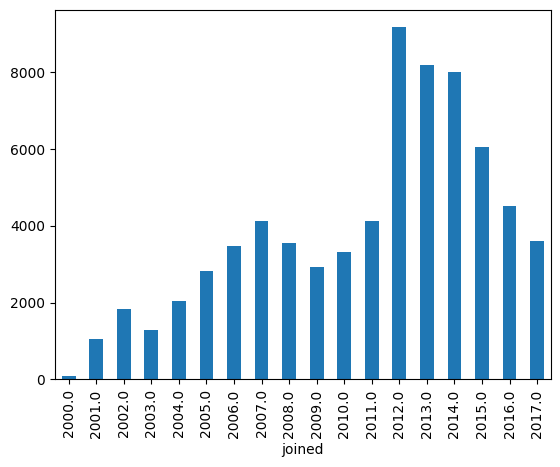

In [ ]:
rate_users["joined"].groupby([rate_users["joined"].dt.year]).count().plot(kind="bar")

In [ ]:
pd.unique(rate_users.location)

array(['Poland', 'Spain', 'Germany', 'Belgium',
       'United States, Connecticut', 'United States, Virginia',
       'United States, Washington', 'United States, North Carolina',
       'Denmark', 'Scotland', 'Sweden', 'Finland', nan,
       'United States, Minnesota', 'Ireland', 'Northern Ireland',
       'New Zealand', 'Estonia', 'England', 'Netherlands', 'Israel',
       'Czech Republic', 'Singapore', 'United States, Wisconsin',
       'United States, Alabama', 'France', 'Austria', 'Norway', 'Italy',
       'Canada', 'Switzerland', 'Australia', 'United States, New York',
       'Malaysia', 'United States, Texas', 'United States, Oregon',
       'Belarus', 'United States, Georgia', 'United States, Michigan',
       'United States, Ohio', 'United States, Maryland', 'Japan',
       'Bulgaria', 'United States, Kansas', 'Russia',
       'United States, California', 'United States, Pennsylvania',
       'United States, New Jersey', 'Hungary', 'Greece', 'Luxembourg',
       'Mexico', 'Wa

In [ ]:
rate_files[2]

'beers.csv'

In [ ]:
rate_beers = pd.read_csv(os.path.join(rate_dir, 'beers.csv'))

In [ ]:
rate_beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442081 entries, 0 to 442080
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   beer_id                    442081 non-null  int64  
 1   beer_name                  442081 non-null  object 
 2   brewery_id                 442081 non-null  int64  
 3   brewery_name               442081 non-null  object 
 4   style                      442081 non-null  object 
 5   nbr_ratings                442081 non-null  int64  
 6   overall_score              104028 non-null  float64
 7   style_score                104068 non-null  float64
 8   avg                        395657 non-null  float64
 9   abv                        399987 non-null  float64
 10  avg_computed               396690 non-null  float64
 11  zscore                     42228 non-null   float64
 12  nbr_matched_valid_ratings  442081 non-null  int64  
 13  avg_matched_valid_ratings  42

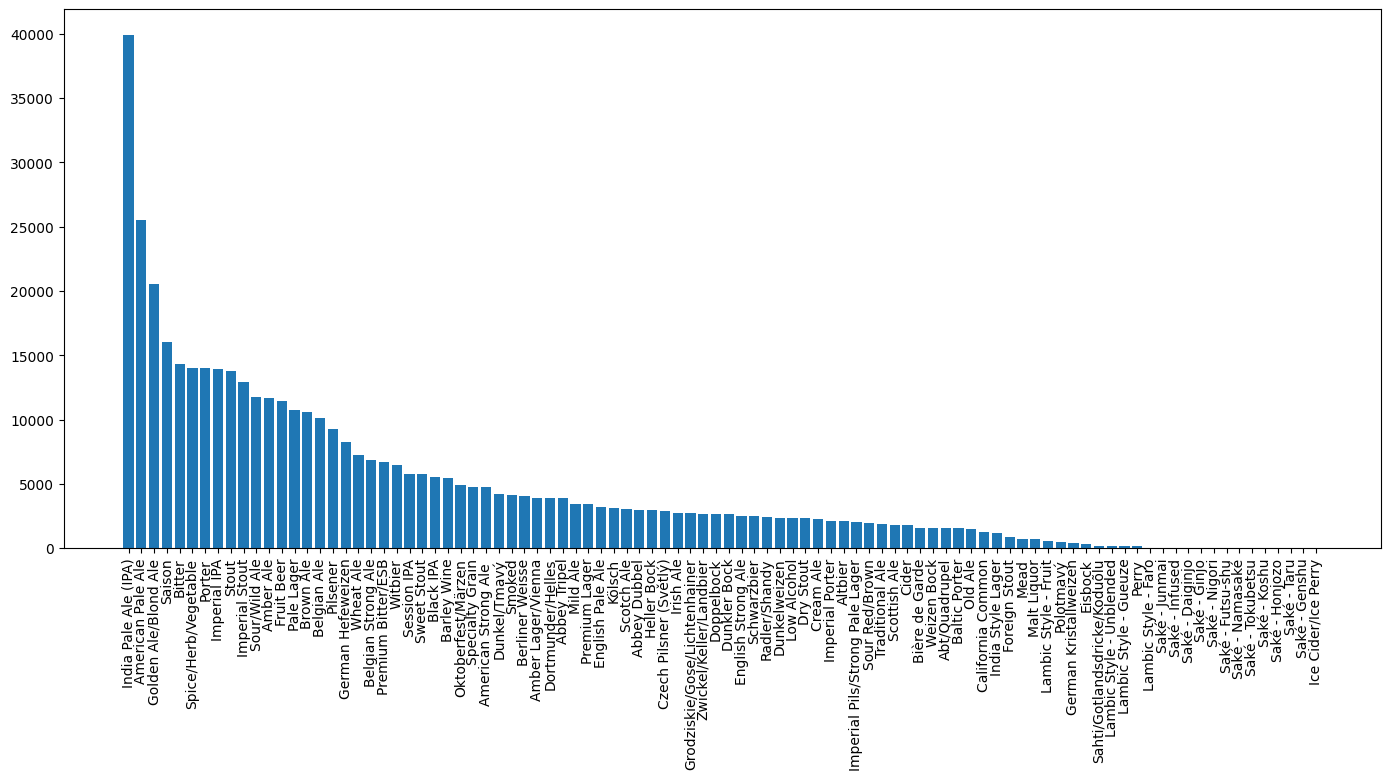

In [ ]:
fig  = plt.figure(figsize=(17,7))
plt.bar(rate_beers['style'].value_counts().index, rate_beers['style'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [ ]:
rate_beers['overall_score'].describe()

,overall_score
count,104028.000000
mean,55.680817
std,28.482652
min,0.000000
25%,34.000000
50%,53.000000
75%,83.000000
max,100.000000


<Axes: ylabel='Frequency'>

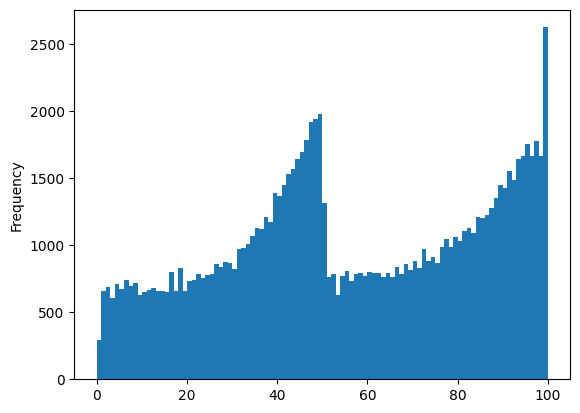

In [ ]:
rate_beers['overall_score'].plot(kind='hist', bins = 100)

In [ ]:
rate_beers['style_score'].describe()

,style_score
count,104068.000000
mean,54.986124
std,28.655427
min,0.000000
25%,33.000000
50%,51.000000
75%,82.000000
max,100.000000


<Axes: ylabel='Frequency'>

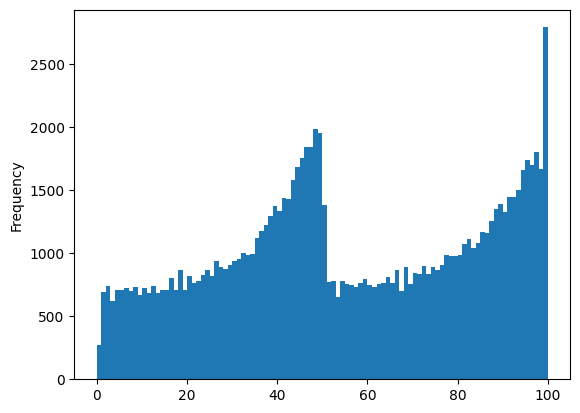

In [ ]:
rate_beers['style_score'].plot(kind='hist', bins = 100)

In [ ]:
rate_beers['avg'].describe()

,avg
count,395657.000000
mean,3.026580
std,0.304503
min,0.000000
25%,2.870000
50%,3.020000
75%,3.180000
max,4.520000


<Axes: ylabel='Frequency'>

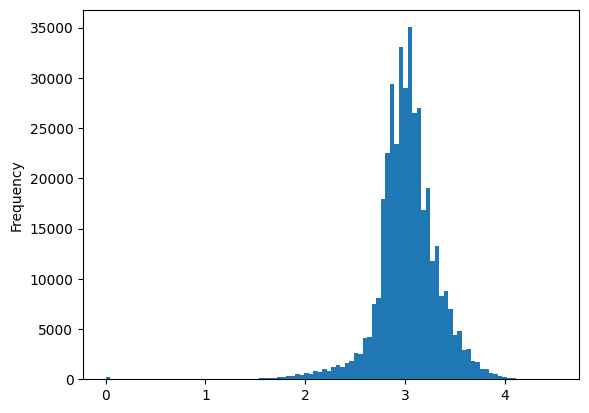

In [ ]:
rate_beers['avg'].plot(kind='hist', bins = 100)

In [ ]:
rate_beers['abv'].describe()

,abv
count,399987.000000
mean,6.065485
std,1.922965
min,0.010000
25%,4.800000
50%,5.600000
75%,7.000000
max,100.000000


<Axes: ylabel='Frequency'>

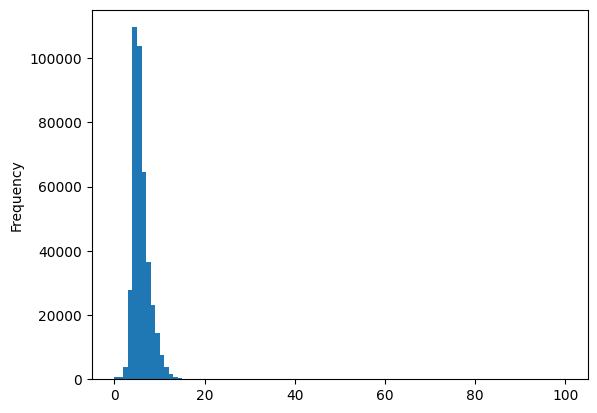

In [ ]:
rate_beers['abv'].plot(kind='hist', bins = 100)

In [ ]:
rate_beers['avg_computed'].describe()

,avg_computed
count,396690.000000
mean,3.244649
std,0.507520
min,0.500000
25%,3.000000
50%,3.300000
75%,3.594088
max,5.000000


<Axes: ylabel='Frequency'>

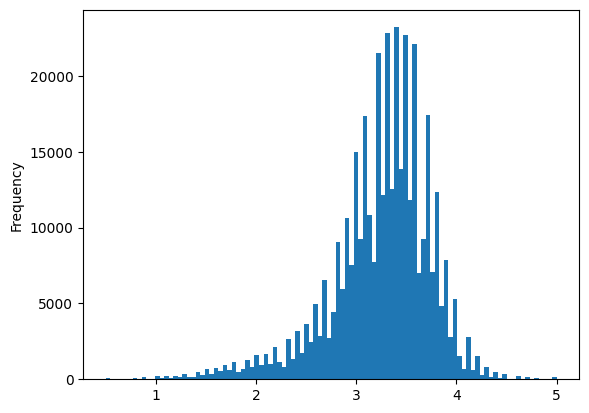

In [ ]:
rate_beers['avg_computed'].plot(kind='hist', bins = 100)

In [ ]:
rate_beers['zscore'].describe()

,zscore
count,42228.000000
mean,-0.104638
std,0.732841
min,-5.460346
25%,-0.479561
50%,-0.023696
75%,0.364636
max,2.941123


<Axes: ylabel='Frequency'>

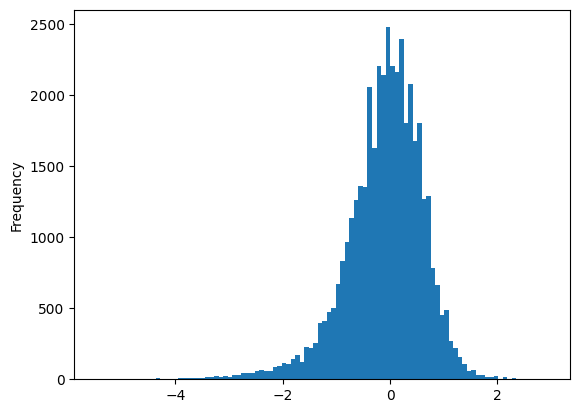

In [ ]:
rate_beers['zscore'].plot(kind='hist', bins = 100)

In [ ]:
rate_beers['nbr_matched_valid_ratings'].describe()

#avg_matched_valid_ratings

,nbr_matched_valid_ratings
count,442081.000000
mean,2.308624
std,26.621223
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5270.000000


<Axes: ylabel='Frequency'>

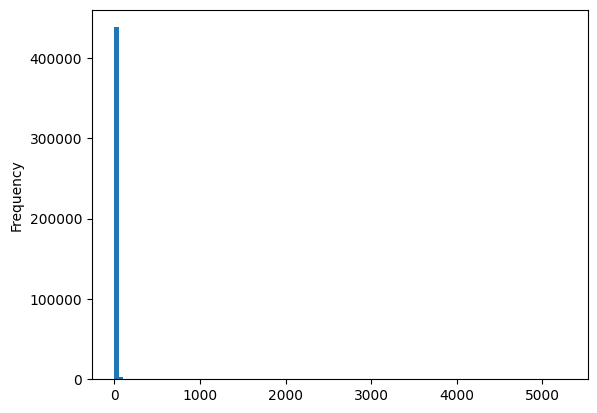

In [ ]:
rate_beers['nbr_matched_valid_ratings'].plot(kind='hist', bins = 100)

In [ ]:
rate_beers['avg_matched_valid_ratings'].describe()


,avg_matched_valid_ratings
count,42228.000000
mean,3.372042
std,0.417038
min,0.500000
25%,3.155129
50%,3.409808
75%,3.650000
max,5.000000


<Axes: ylabel='Frequency'>

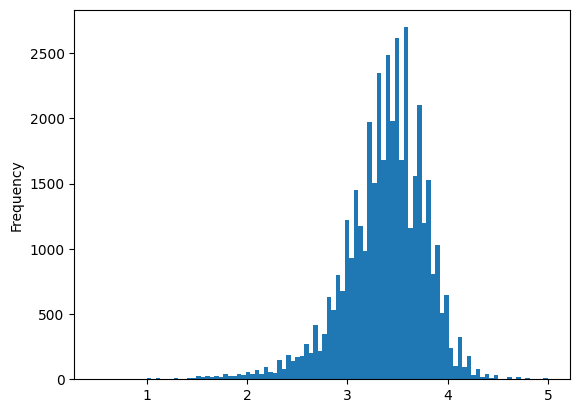

In [ ]:
rate_beers['avg_matched_valid_ratings'].plot(kind='hist', bins = 100)

In [ ]:
rate_files

['breweries.csv',
 'users.csv',
 'beers.csv',
 'ratings.txt',
 'reviews.txt',
 'ratings_RB.csv',
 'reviews_tagged.csv']

In [ ]:
rate_ratings = pd.read_csv(os.path.join(rate_dir, 'ratings_RB.csv'))

In [ ]:
rate_ratings['date'] = pd.to_datetime(rate_ratings['date'], unit='s')

In [ ]:
rate_ratings

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,2016-04-26 10:00:00,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2017-02-17 11:00:00,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-06-24 10:00:00,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2016-01-01 11:00:00,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,2015-10-23 10:00:00,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7122069,Svejk Blonde,220897,Svejk Beer Garden,17155,Pale Lager,NaN,2014-09-18 10:00:00,Travlr,83882,3,6,2,5,10,2.6,"Draft at the source. Clear golden color, fluff..."
7122070,Svejk Blonde,220897,Svejk Beer Garden,17155,Pale Lager,NaN,2013-12-01 11:00:00,TBone,10233,2,5,2,6,10,2.5,"Tap @brewpub, TiraneClear golden color, good c..."
7122071,Svejk Dark,220898,Svejk Beer Garden,17155,Dunkel/Tmavý,NaN,2014-11-04 11:00:00,Rob_D_UK,257161,3,4,2,5,9,2.3,In their beer garden after a walking tour arou...
7122072,Svejk Dark,220898,Svejk Beer Garden,17155,Dunkel/Tmavý,NaN,2014-09-16 10:00:00,Travlr,83882,3,5,1,4,6,1.9,"Draft at the source. Hazy maroon color, tan he..."


<Axes: xlabel='date'>

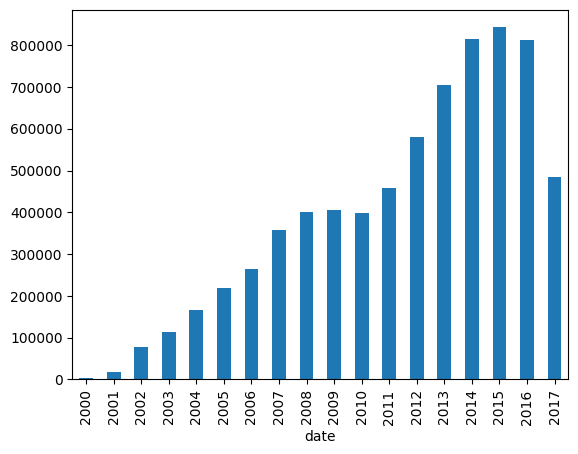

In [ ]:
rate_ratings["date"].groupby([rate_ratings["date"].dt.year]).count().plot(kind="bar")

In [ ]:
rate_ratings['appearance'].describe()


,appearance
count,7.122074e+06
mean,3.440407e+00
std,7.737700e-01
min,1.000000e+00
25%,3.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,5.000000e+00


<Axes: ylabel='Frequency'>

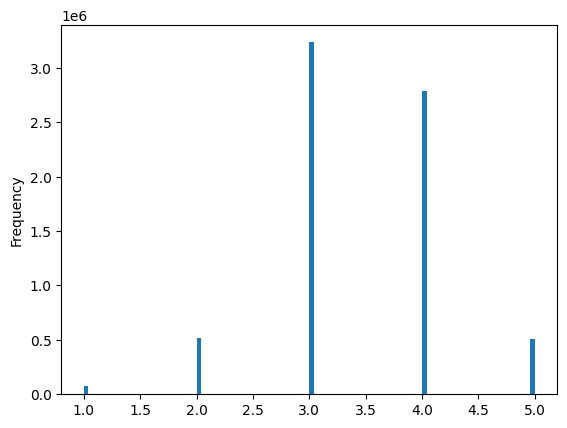

In [ ]:
rate_ratings['appearance'].plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

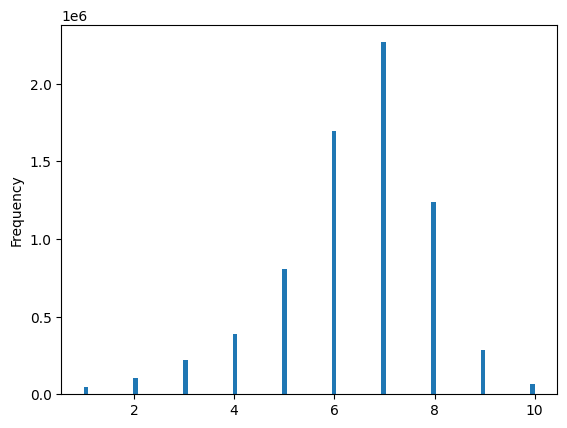

In [ ]:
rate_ratings['aroma'].describe()
rate_ratings['aroma'].plot(kind='hist', bins = 100)


<Axes: ylabel='Frequency'>

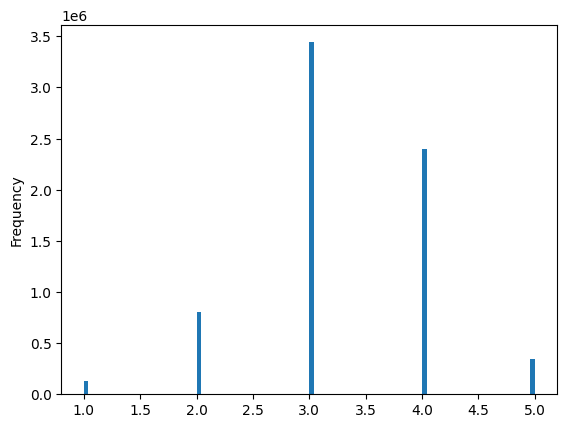

In [ ]:
rate_ratings['palate'].describe()
rate_ratings['palate'].plot(kind='hist', bins = 100)


<Axes: ylabel='Frequency'>

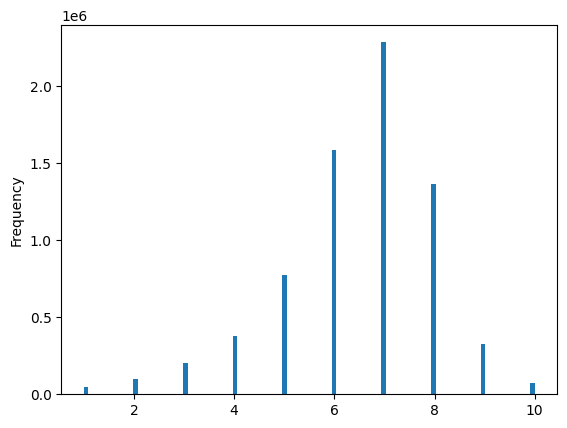

In [ ]:
rate_ratings['taste'].describe()
rate_ratings['taste'].plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

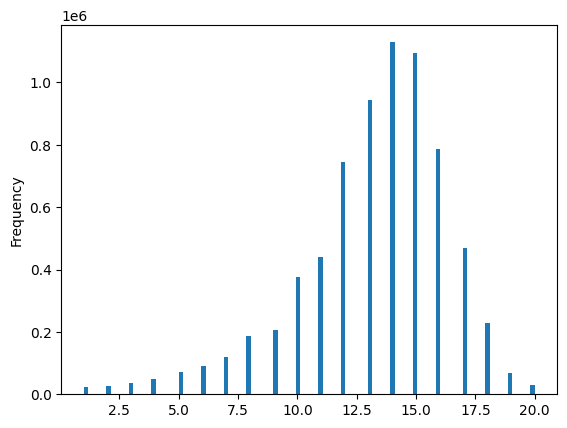

In [ ]:
rate_ratings['overall'].describe()
rate_ratings['overall'].plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

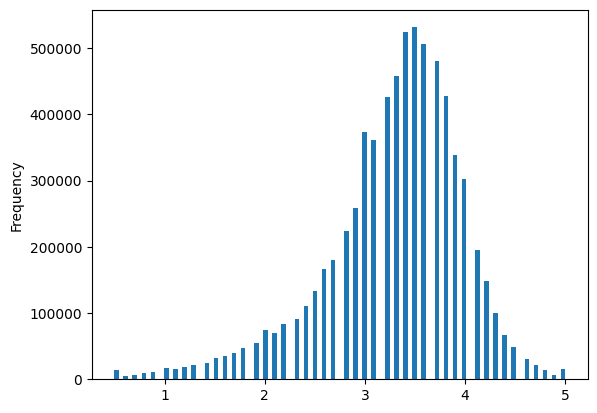

In [ ]:
rate_ratings['rating'].describe()
rate_ratings['rating'].plot(kind='hist', bins = 100)

In [ ]:
rate_reviews = pd.read_csv(os.path.join(rate_dir, 'reviews_tagged.csv'))

In [ ]:
rate_reviews

,beer_id,date,user_id,lang_tag
0,410549,1461664800,175852,pl
1,105273,1487329200,442761,es
2,105273,1466762400,288889,pl
3,105273,1451646000,250510,es
4,105273,1445594400,122778,en
...,...,...,...,...
7122069,220897,1411034400,83882,en
7122070,220897,1385895600,10233,en
7122071,220898,1415098800,257161,en
7122072,220898,1410861600,83882,en


In [ ]:
advocate_files = os.listdir(advocate_dir)

In [ ]:
advocate_files

['breweries.csv',
 'users.csv',
 'beers.csv',
 'reviews.txt',
 'ratings.txt',
 'ratings_BA.csv',
 'reviews_tagged .csv']

In [ ]:
adv_breweries = pd.read_csv(os.path.join(advocate_dir, 'breweries.csv'))

In [ ]:
adv_breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16758 non-null  int64 
 1   location   16758 non-null  object
 2   name       16758 non-null  object
 3   nbr_beers  16758 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 523.8+ KB


In [ ]:
adv_users = pd.read_csv(os.path.join(advocate_dir, 'users.csv'))
adv_users['joined'] = pd.to_datetime(adv_users['joined'], unit='s')

In [ ]:
adv_users
#user_id is just the user_name followed by a number. Need to check if the number is a unique identifier, or if the user_name is a unique identifier
#nbr_ratings is a separate column from nbr_reviews. This is different from RateBeer.

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,2008-01-07 11:00:00,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,2007-10-08 10:00:00,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,2005-05-18 10:00:00,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,2004-11-25 11:00:00,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,2003-11-20 11:00:00,Northern Ireland
...,...,...,...,...,...,...
153699,1,1,everman.532342,Everman,2010-11-30 11:00:00,"United States, California"
153700,1,1,justin0001.352175,Justin0001,2009-07-23 10:00:00,"United States, California"
153701,1,0,kyungsup.982216,Kyungsup,2015-05-02 10:00:00,NaN
153702,1,1,joetex.800347,JoeTex,2014-05-16 10:00:00,"United States, California"


In [ ]:
adv_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153704 entries, 0 to 153703
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   nbr_ratings  153704 non-null  int64         
 1   nbr_reviews  153704 non-null  int64         
 2   user_id      153704 non-null  object        
 3   user_name    153703 non-null  object        
 4   joined       151052 non-null  datetime64[ns]
 5   location     122425 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 7.0+ MB


<Axes: xlabel='joined'>

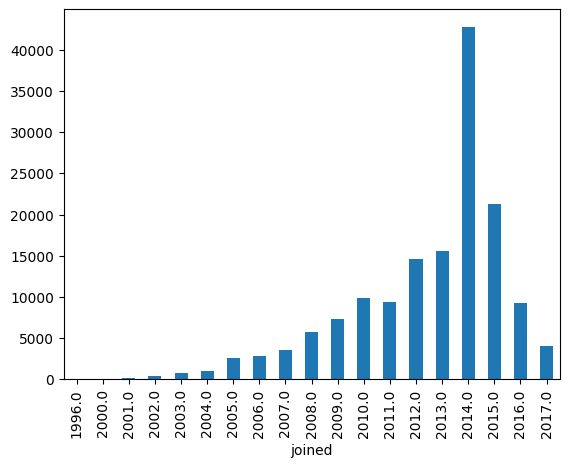

In [ ]:
adv_users['joined'].groupby([adv_users['joined'].dt.year]).count().plot(kind="bar")

In [ ]:
adv_beers = pd.read_csv(os.path.join(advocate_dir, 'beers.csv'))

In [ ]:
adv_beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280823 entries, 0 to 280822
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   beer_id                    280823 non-null  int64  
 1   beer_name                  280823 non-null  object 
 2   brewery_id                 280823 non-null  int64  
 3   brewery_name               280823 non-null  object 
 4   style                      280823 non-null  object 
 5   nbr_ratings                280823 non-null  int64  
 6   nbr_reviews                280823 non-null  int64  
 7   avg                        247994 non-null  float64
 8   ba_score                   61200 non-null   float64
 9   bros_score                 5702 non-null    float64
 10  abv                        244799 non-null  float64
 11  avg_computed               247982 non-null  float64
 12  zscore                     40285 non-null   float64
 13  nbr_matched_valid_ratings  28

In [ ]:
adv_beers.ba_score.describe()

,ba_score
count,61200.000000
mean,84.633284
std,4.052723
min,46.000000
25%,83.000000
50%,85.000000
75%,86.000000
max,100.000000


<Axes: ylabel='Frequency'>

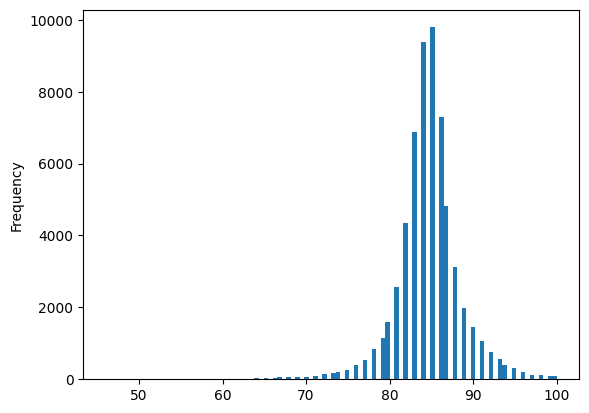

In [ ]:
adv_beers.ba_score.plot(kind='hist', bins = 100)

In [ ]:
adv_beers.avg.describe()

,avg
count,247994.000000
mean,3.721034
std,0.476003
min,0.000000
25%,3.500000
50%,3.780000
75%,4.010000
max,5.000000


<Axes: ylabel='Frequency'>

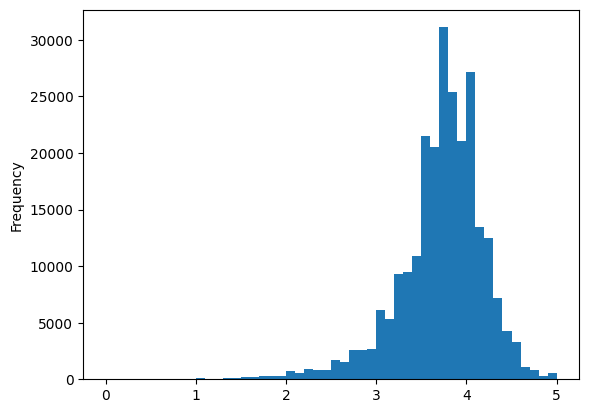

In [ ]:
adv_beers.avg.plot(kind='hist', bins = 50)

<Axes: ylabel='Frequency'>

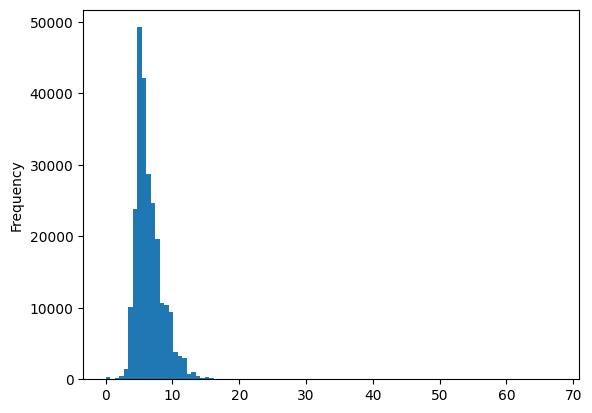

In [ ]:
adv_beers.abv.plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

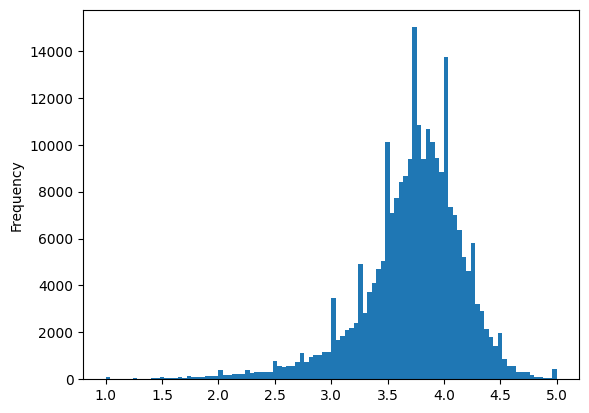

In [ ]:
adv_beers.avg_computed.plot(kind='hist', bins = 100)

In [ ]:
adv_beers.nbr_matched_valid_ratings.describe()

,nbr_matched_valid_ratings
count,280823.000000
mean,1.029207
std,17.295308
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2968.000000


In [ ]:
adv_beers.nbr_matched_valid_ratings.value_counts()

,count
nbr_matched_valid_ratings,
0,252551
1,12117
2,4683
3,2485
4,1523
...,...
379,1
841,1
114,1


In [ ]:
adv_ratings = pd.read_csv(os.path.join(advocate_dir, 'ratings_BA.csv'))


In [ ]:
adv_ratings.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review'],
      dtype='object')

In [ ]:
adv_ratings.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True


In [ ]:
# prompt: For each row in adv_ratings, create another column with a value which counts the number of unique values in appearance, aroma, palate, taste, overall

def count_unique_ratings(row):
  return len(set([row['appearance'], row['aroma'], row['palate'], row['taste'], row['overall']]))

adv_ratings['unique_rating_count'] = adv_ratings.apply(count_unique_ratings, axis=1)

In [ ]:
adv_ratings['date'] = pd.to_datetime(adv_ratings['date'], unit='s')

<Axes: ylabel='Frequency'>

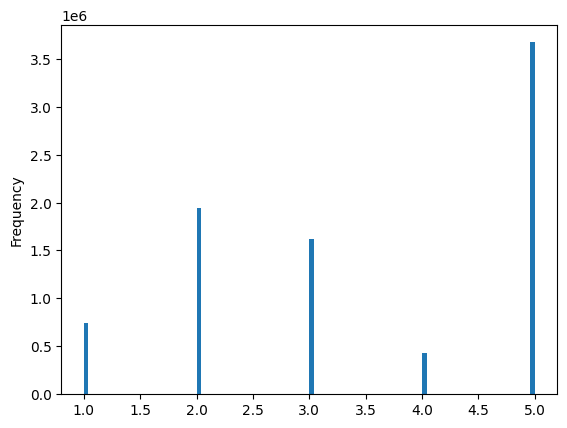

In [ ]:
adv_ratings['unique_rating_count'].plot(kind='hist', bins = 100)

<Axes: >

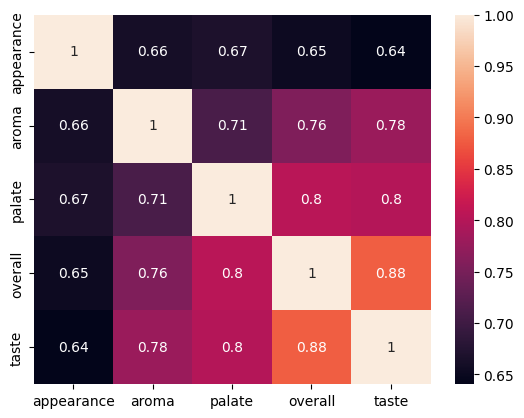

In [ ]:
sns.heatmap(adv_ratings[['appearance', 'aroma', 'palate', 'overall', 'taste']].corr(), annot=True)

In [ ]:
# prompt: For each user_id in adv_ratings, return the first and the last unique_rating_count value sorted by date.

# Group by user_id and sort by date
#grouped_ratings = adv_ratings.groupby('user_id').apply(lambda x: x.sort_values('date'))

#grouped_ratings = grouped_ratings.drop('user_id', axis=1)
# Get the first and last unique_rating_count for each user
result = grouped_ratings.groupby('user_id').agg({'unique_rating_count': ['first', 'last']})

# Flatten the multi-level column index
result.columns = ['first_unique_rating_count', 'last_unique_rating_count']

result

,first_unique_rating_count,last_unique_rating_count
user_id,,
-----kiki-----.1000245,1,2
---.940711,3,1
--dida--.1042029,3,4
--dom--.709199,2,1
--nomad--.931404,1,1
...,...,...
zzxasd43and.416381,5,5
zzyskowski.807938,5,5
zzyzx.174143,2,2


In [ ]:
result.first_unique_rating_count.mean()

3.794832925623276

In [ ]:
result.last_unique_rating_count.mean()

3.6007520949357206

In [ ]:
result['increased'] = result['last_unique_rating_count'] > result['first_unique_rating_count']

In [ ]:
result.increased.value_counts()

,count
increased,
False,133522
True,20182


<Axes: ylabel='Frequency'>

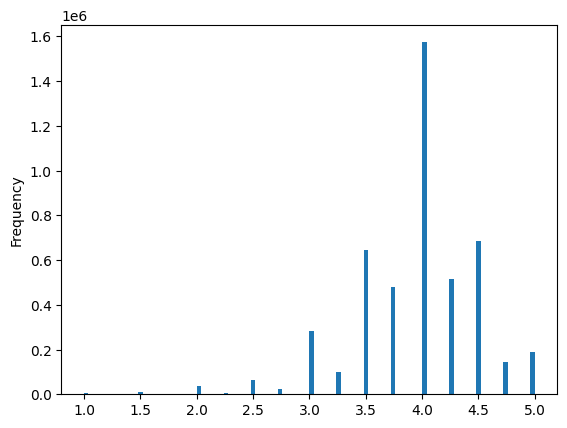

In [ ]:
adv_ratings.appearance.plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

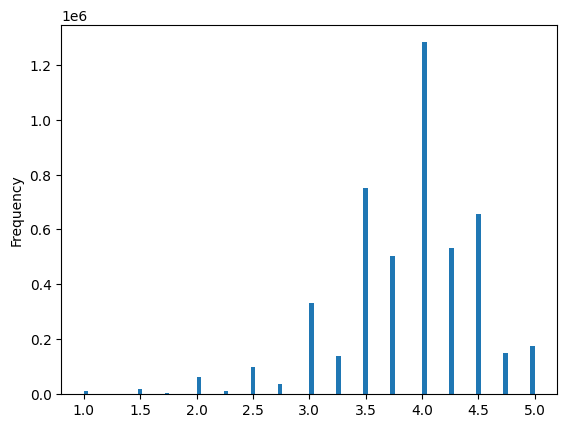

In [ ]:
adv_ratings.aroma.plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

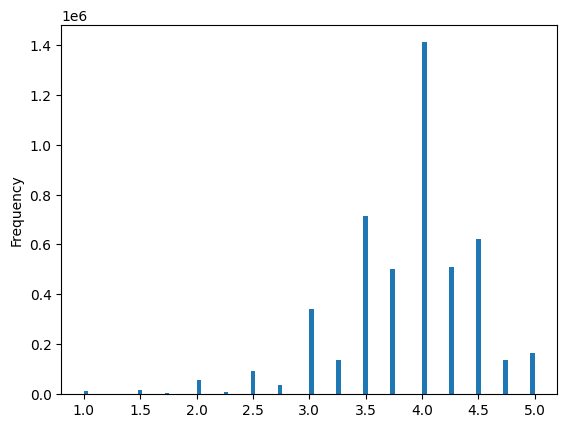

In [ ]:
adv_ratings.palate.plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

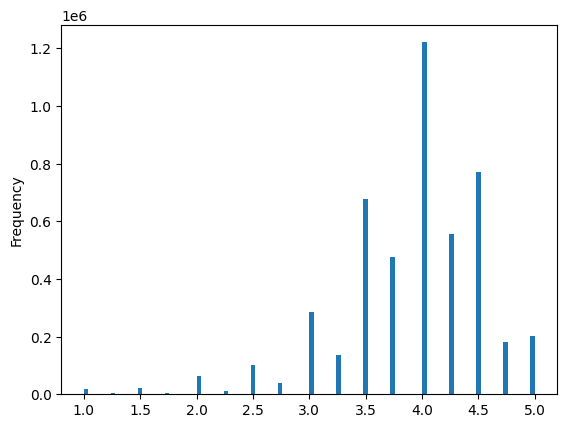

In [ ]:
adv_ratings.taste.plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

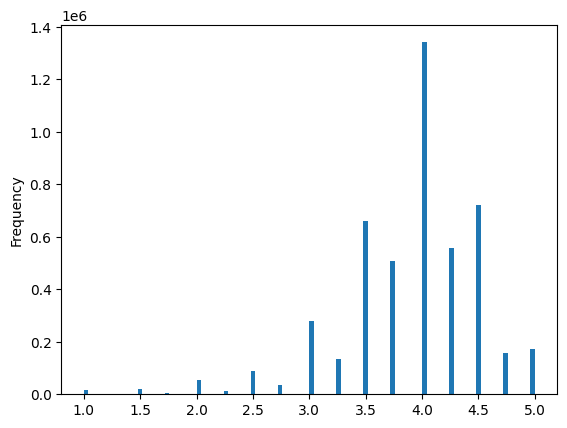

In [ ]:
adv_ratings.overall.plot(kind='hist', bins = 100)

<Axes: ylabel='Frequency'>

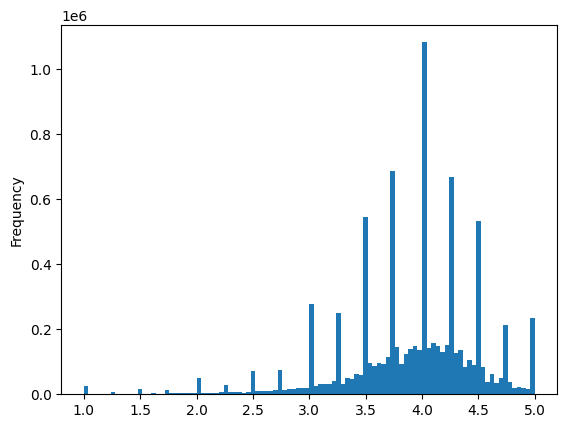

In [ ]:
adv_ratings.rating.plot(kind='hist', bins = 100)

In [ ]:
beer_rate = pd.read_csv(os.path.join(rate_dir, 'beers.csv'))

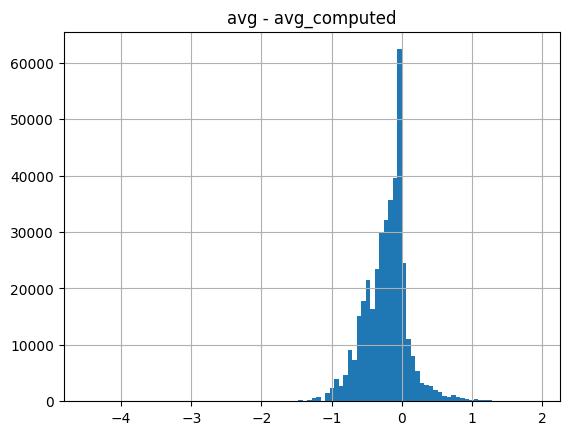

In [ ]:
(beer_rate['avg'] - beer_rate['avg_computed']).hist(bins = 100)
plt.title( 'avg - avg_computed')
plt.show()

In [ ]:
len(beer_rate.zscore.dropna())

42228

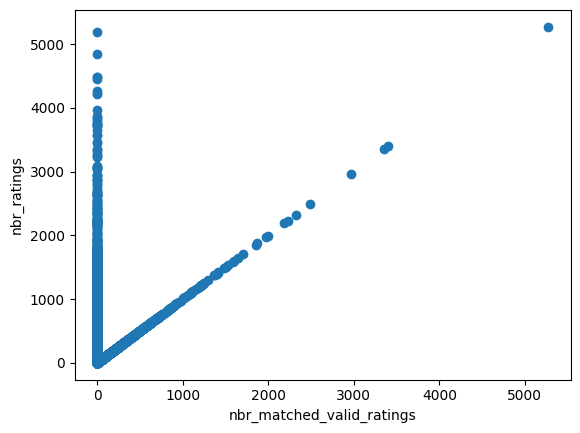

In [ ]:
plt.scatter(x = beer_rate.nbr_matched_valid_ratings, y = beer_rate.nbr_ratings)
plt.xlabel('nbr_matched_valid_ratings')
plt.ylabel('nbr_ratings')
plt.show()

In [ ]:
beer_rate


,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN


In [ ]:
breweries_rate = pd.read_csv(os.path.join(rate_dir, 'breweries.csv'))

In [ ]:
breweries_rate

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3
...,...,...,...,...
24184,28180,Albania,Shoqeria Picana,1
24185,1107,Albania,Stefani & Co,11
24186,9355,Albania,Hotel Martini,1
24187,9928,Albania,Rozafa Brewery,1


In [ ]:
beer_advocate = pd.read_csv(os.path.join(advocate_dir, 'beers.csv'))

In [ ]:
beer_advocate[beer_advocate['beer_id'] == 155699]

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
193062,155699,The White Queen Bids Farewell,27773,Mystery Brewing Company,Scottish Ale,1,0,4.25,NaN,NaN,NaN,4.25,NaN,0,NaN


In [ ]:

rate_ratings = [line.rstrip() for line in open(os.path.join(rate_dir, 'ratings.txt'), 'r')]


In [ ]:
rate_ratings[:50]

['beer_name: 33 Export (Gabon)',
 'beer_id: 410549',
 'brewery_name: Sobraga',
 'brewery_id: 3198',
 'style: Pale Lager',
 'abv: 5.0',
 'date: 1461664800',
 'user_name: Manslow',
 'user_id: 175852',
 'appearance: 2',
 'aroma: 4',
 'palate: 2',
 'taste: 4',
 'overall: 8',
 'rating: 2.00',
 'text: Puszka 0,33l dzięki Christoph . Kolor jasnozłoty, piana biała drobnoziarnista szybko opada. Aromat słodowy, lekko słodkie.Dość dobre.',
 '',
 'beer_name: Castel Beer (Gabon)',
 'beer_id: 105273',
 'brewery_name: Sobraga',
 'brewery_id: 3198',
 'style: Pale Lager',
 'abv: 5.2',
 'date: 1487329200',
 'user_name: MAGICuenca91',
 'user_id: 442761',
 'appearance: 2',
 'aroma: 3',
 'palate: 2',
 'taste: 4',
 'overall: 8',
 'rating: 1.90',
 'text: Cerveza pale lager gabonesa. MÃ¡s floja que la Regab.Aroma escaso, apariencia pÃ¡lida, muy poco cuerpo y poco regusto en el paladar.Si algÃºn dÃ\xada fuera a GabÃ³n pedirÃ\xada una mÃ¡s para volver a probarla y el resto del tiempo pedirÃ\xada la Regab sin du

In [ ]:
import csv

# Function to convert the list to a CSV
def list_to_csv(data, output_csv_file):
    records = []
    current_record = {}

    # Process the data
    for item in data:
        if item == '':
            # When encountering an empty string, add the current record to the list and reset
            if current_record:
                records.append(current_record)
                current_record = {}
        else:
            # Split the key and value and store in the current record
            #print(item)
            key, value = item.split(':', 1)
            current_record[key] = value

    # Append the last record if it wasn't already added
    if current_record:
        records.append(current_record)

    # Get all unique keys (columns for CSV)
    fieldnames = set()
    for record in records:
        fieldnames.update(record.keys())
    fieldnames = list(fieldnames)  # Convert set to list to preserve order

    # Write to CSV
    with open(output_csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()  # Write CSV header
        writer.writerows(records)

# Usage
list_to_csv(rate_ratings, os.path.join(rate_dir, 'ratings.csv'))

In [ ]:
pd.read_csv('beer_data.csv')

,beer_id,brewery_name,appearance,style,user_name,overall,text,aroma,abv,palate,taste,user_id,beer_name,rating,date,brewery_id
0,410549,Sobraga,2.0,Pale Lager,Manslow,8.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",4.0,5.0,2.0,4.0,175852.0,33 Export (Gabon),2.0,1.461665e+09,3198
1,105273,Sobraga,NaN,Pale Lager,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Castel Beer (Gabon),NaN,NaN,3198
